# Test Registration Functions

In this example page I will show how the registration algorithms (`lap`, `pflap`, `sparse_lap` and `sparse_pflap`)
perform. I will will show their speed and the quality of their outputs.

First I some testing images:

In [1]:
# using the package and TimerOutputs
using LAP_julia, TimerOutputs

# default arguments:
img, imgw, flow = gen_init();

See the `Basic Interaction` section or the `Public Documentation` for more advanced input generation

__These are the differences between the `target` (`img`) and `source` (`imgw`) images.__

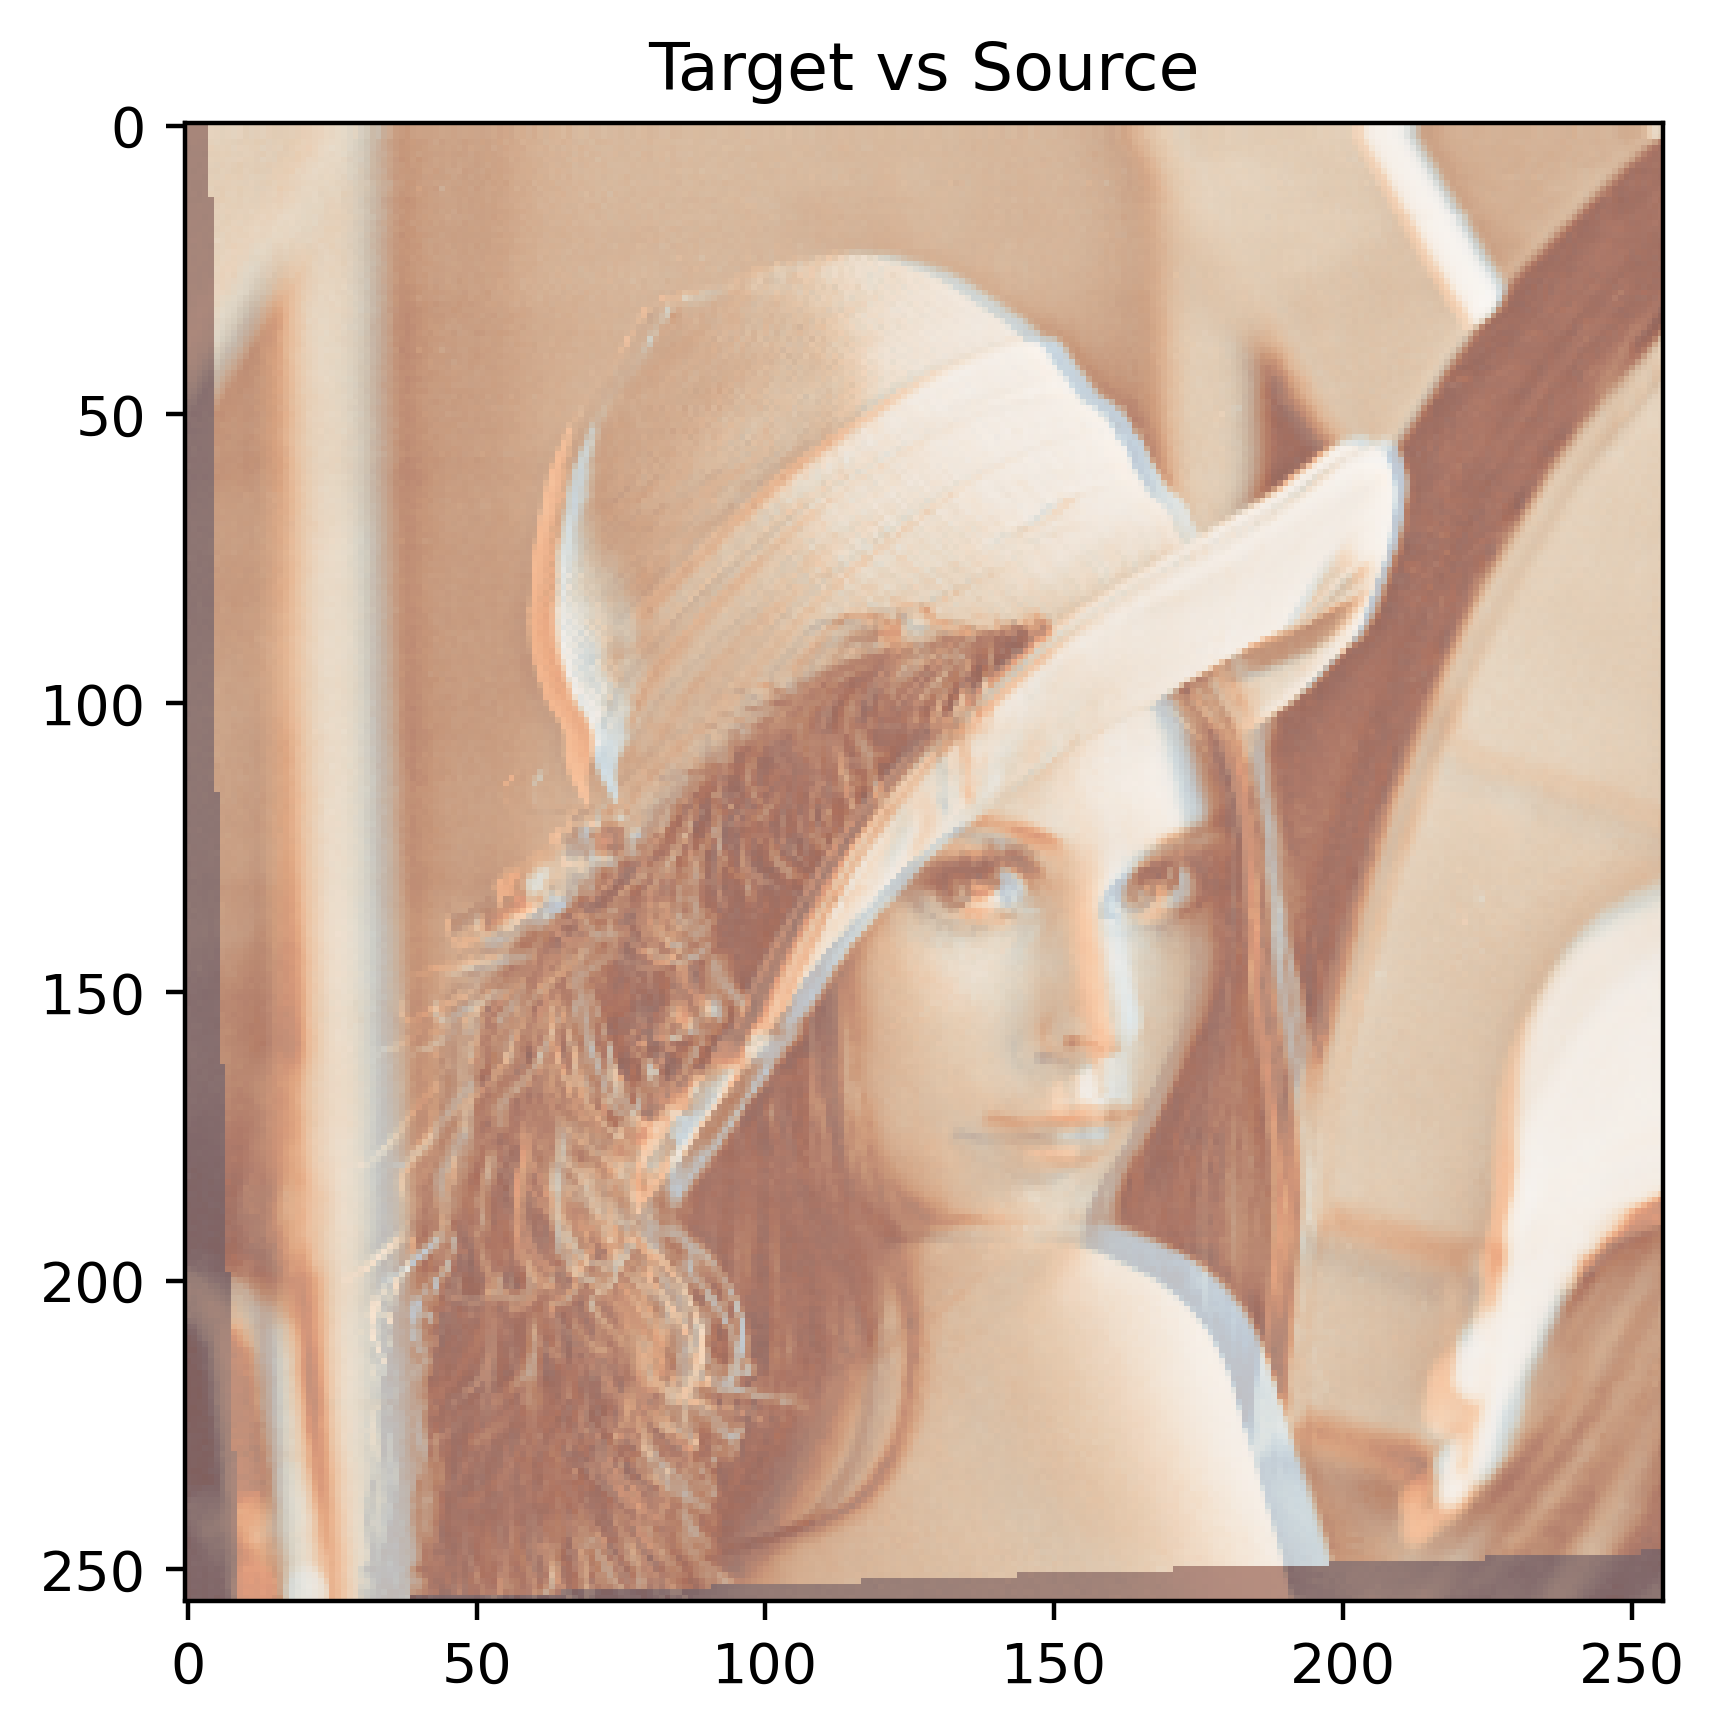

In [2]:
imgoverlay(img, imgw, figtitle="Target vs Source")

## `test_registration_alg`

This function times the registration algorithm on the inside and then test the output flow - `flow_est` and aligned source - `source_reg`.

In [3]:
# choose a method
method = sparse_pflap
# start a timer
timer = TimerOutput("ALG: " * string(method))
# set the keyword arguments of the method
method_kwargs = Dict(:display => false, :timer => timer, :match_source_histogram => false)
# set the arguments of the method if any
method_args = []
# start the test
flow_est, source_reg, timer, results = test_registration_alg(method,
                                                             img,
                                                             imgw,
                                                             flow,
                                                             timer=timer,
                                                             method_args=method_args,
                                                             only_flow_compare=false, # this adds source reg tests.
                                                             method_kwargs=method_kwargs);

 ────────────────────────────────────────────────────────────────────────────
                                     Time                   Allocations      
                             ──────────────────────   ───────────────────────
      Tot / % measured:           2.57s / 16.1%            344MiB / 47.6%    

 Section             ncalls     time   %tot     avg     alloc   %tot      avg
 ────────────────────────────────────────────────────────────────────────────
 ALG: sparse_pflap        1    414ms   100%   414ms    164MiB  100%    164MiB
 ────────────────────────────────────────────────────────────────────────────
  mse            | 0.001
  rmse           | 0.034
  time           | 0.414
  ncc            | 0.983
  flow_mae       | 0.148
  angle-rmse     | 47.195
  angle-mae      | 7.293
  mae            | 0.014
  flow_rmse      | 0.032


#### Check the generated flow and the original flow:
__Ground Truth:__

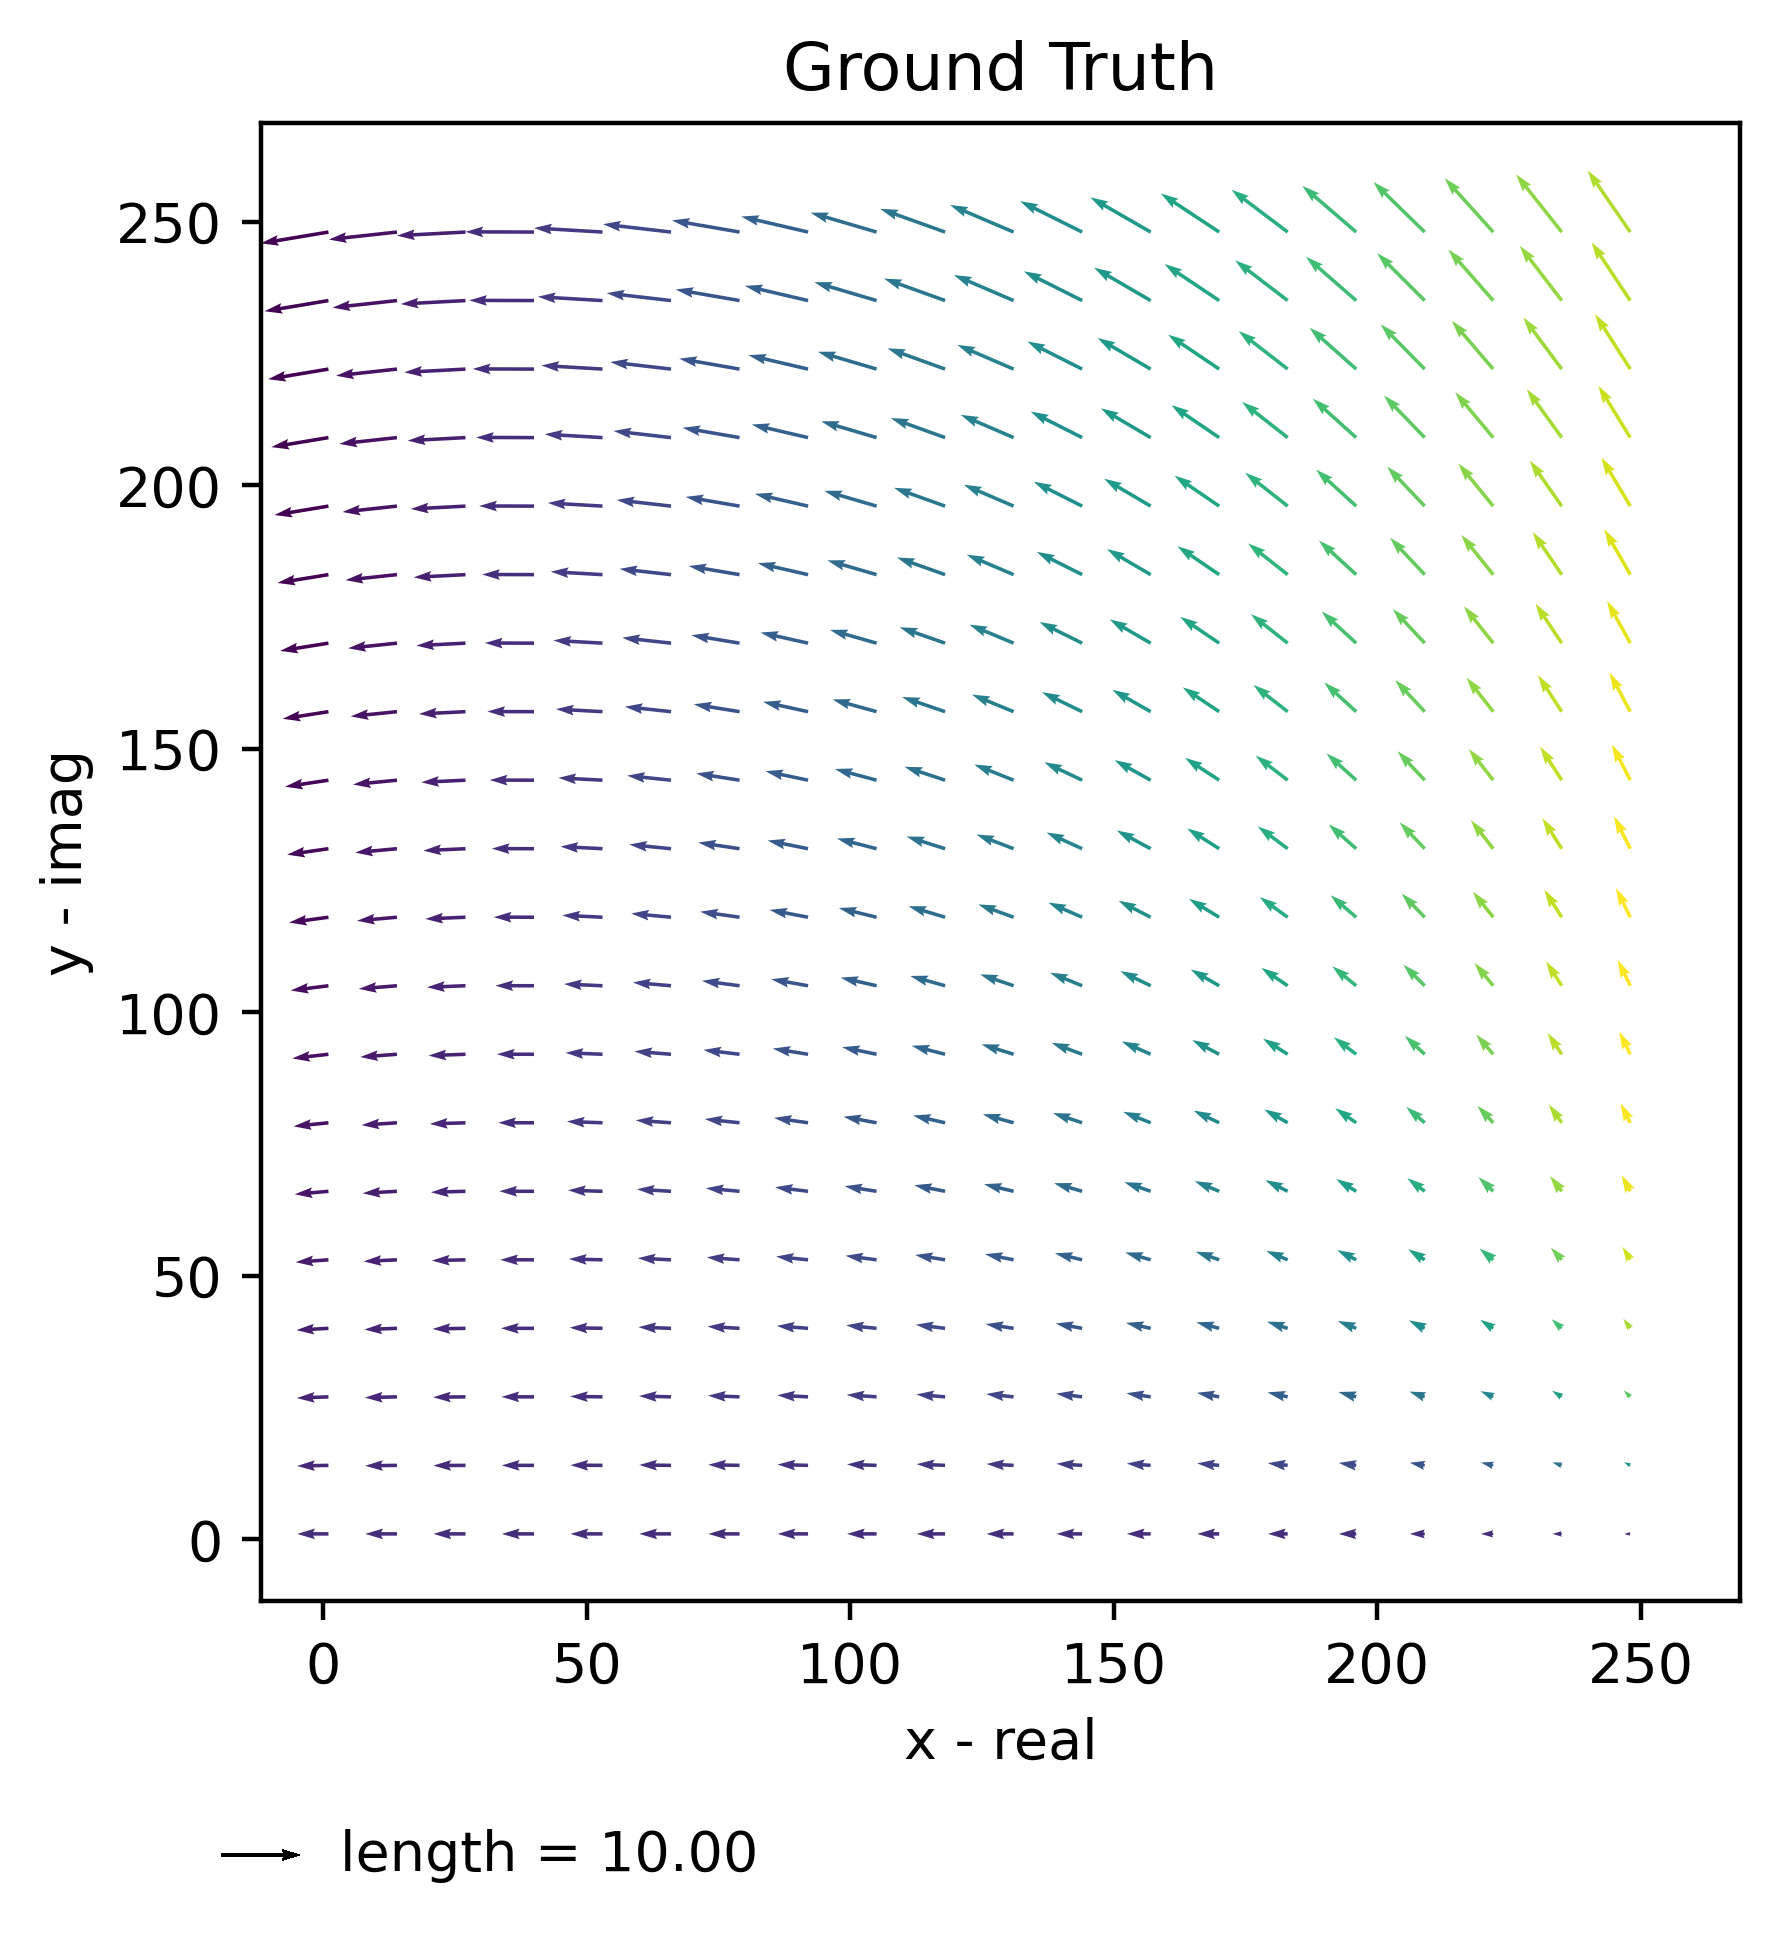

In [4]:
showflow(flow.*(-1), figtitle="Ground Truth")

__Estimated Flow:__

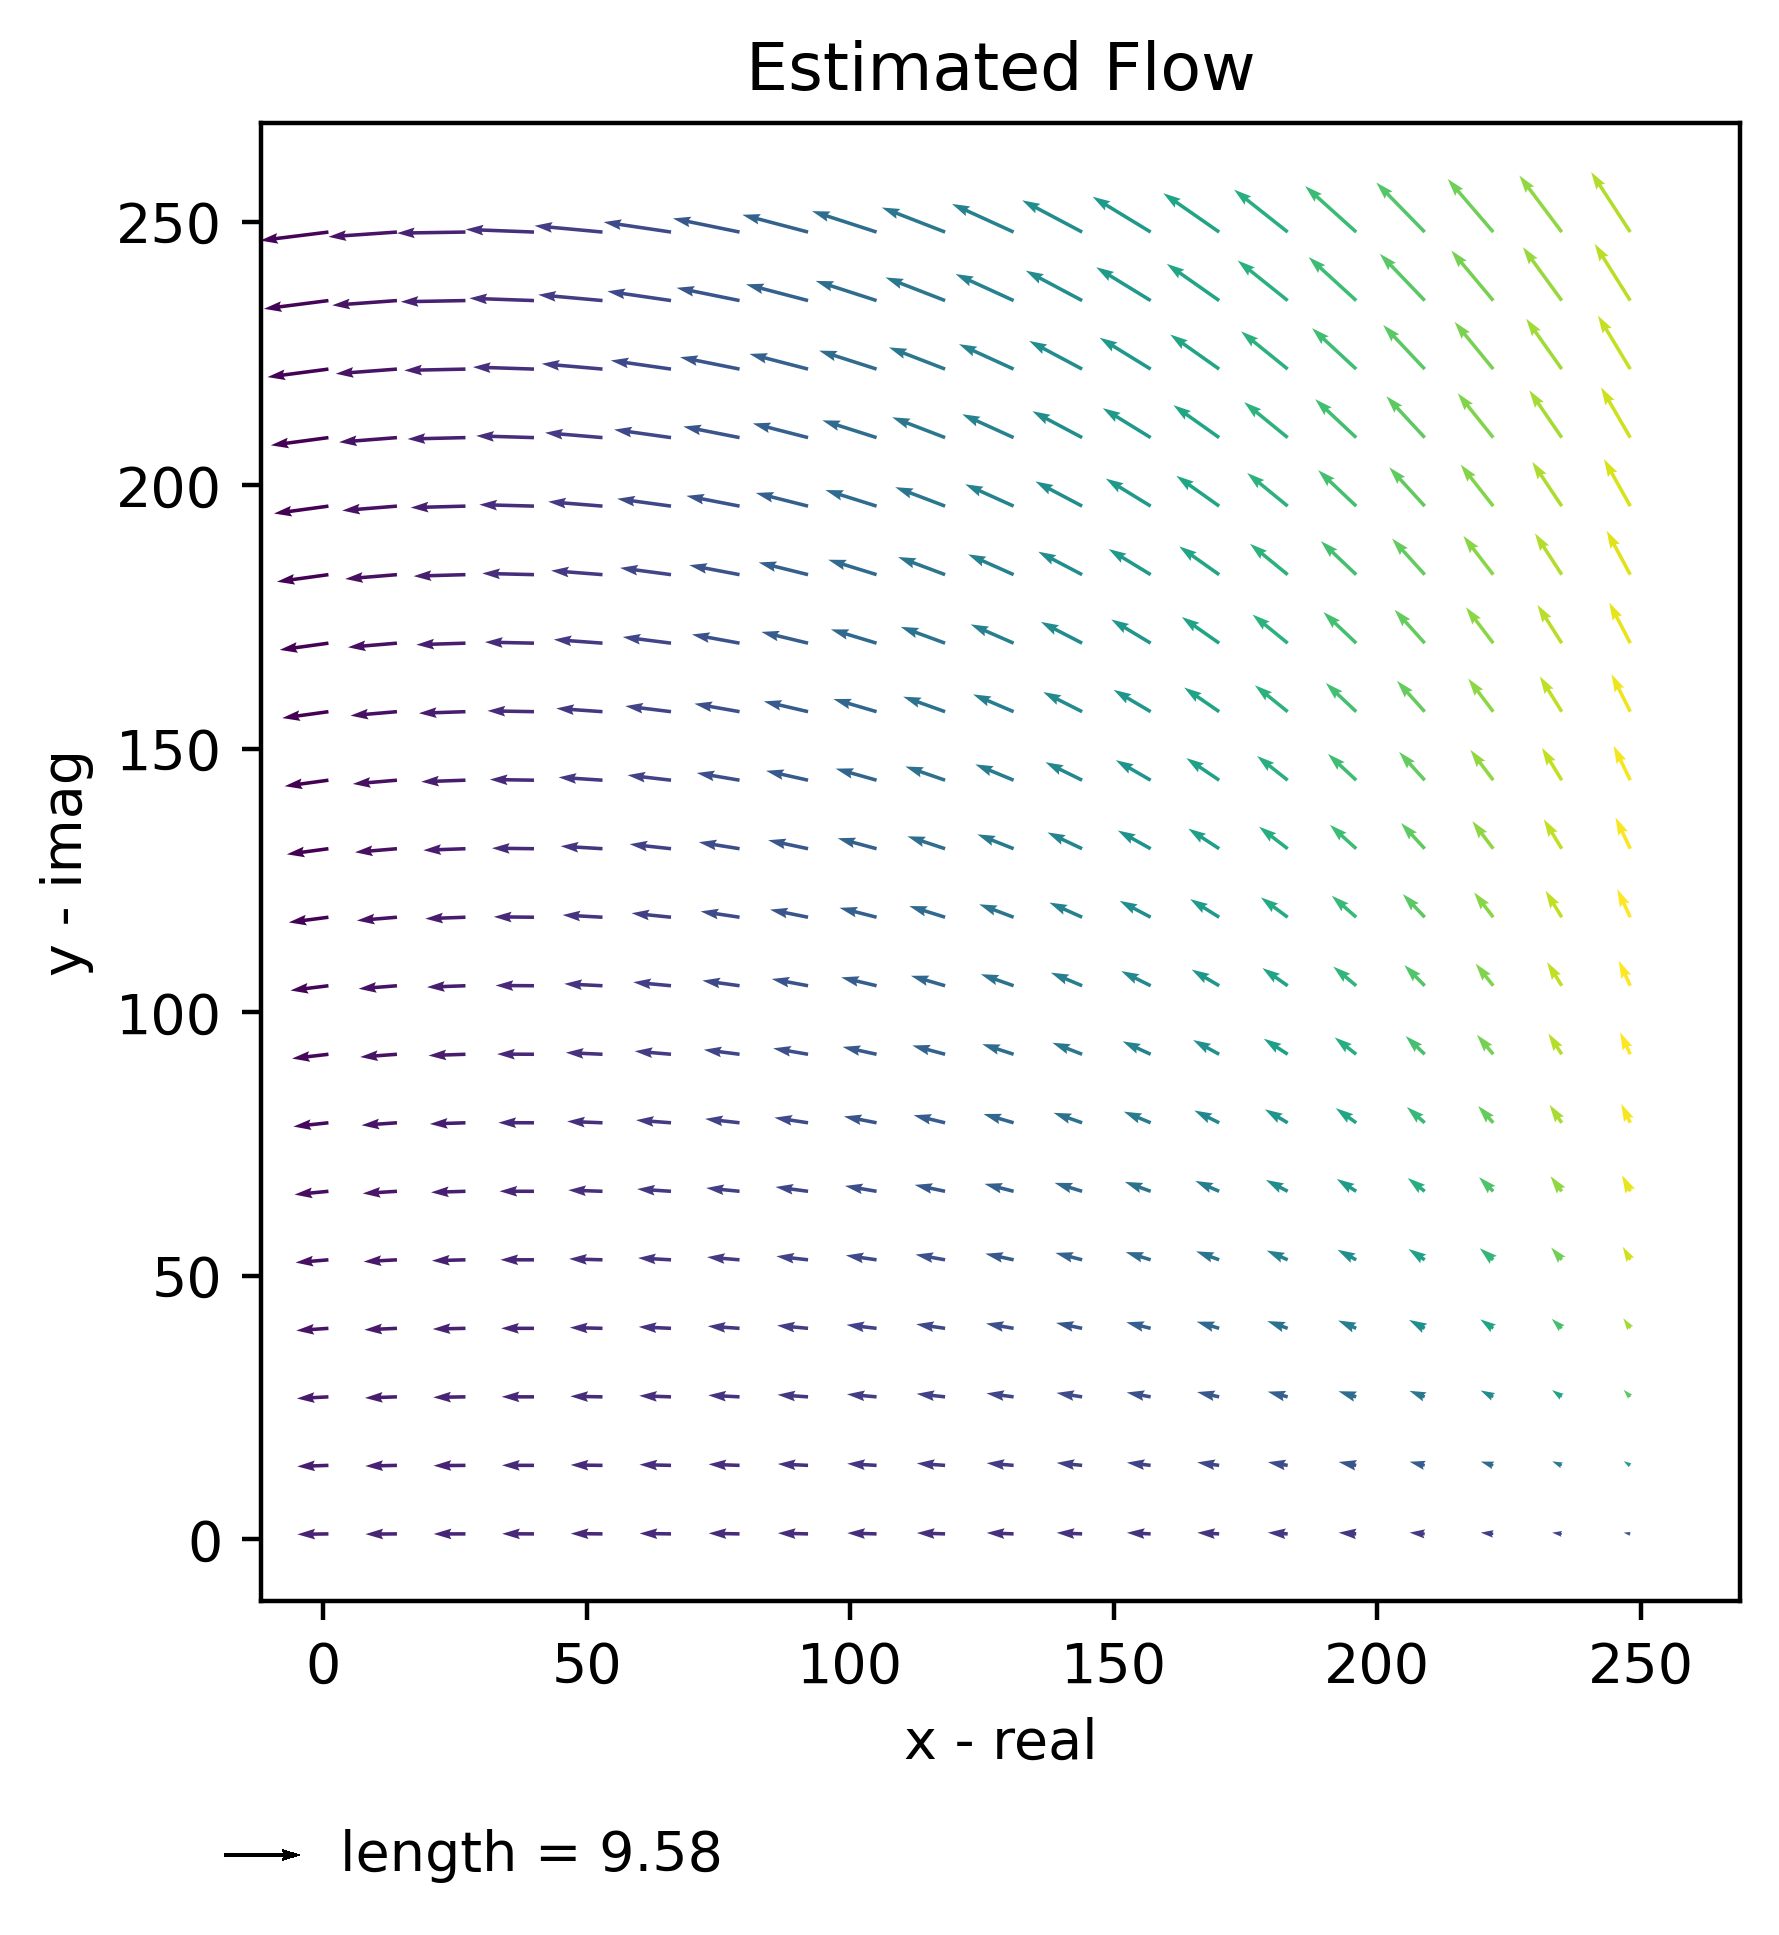

In [5]:
showflow(flow_est, figtitle="Estimated Flow")

### Compare it with the `pflap` function

In [6]:
method = pflap
# same inputs, new timer
timer = TimerOutput("ALG: " * string(method))
flow_est, source_reg, timer, results = test_registration_alg(method,
                                                             img,
                                                             imgw,
                                                             flow,
                                                             timer=timer,
                                                             method_args=method_args,
                                                             only_flow_compare=false, # this adds source reg tests.
                                                             method_kwargs=method_kwargs);

 ─────────────────────────────────────────────────────────────────────
                              Time                   Allocations      
                      ──────────────────────   ───────────────────────
   Tot / % measured:       2.95s / 100%             936MiB / 99.4%    

 Section      ncalls     time   %tot     avg     alloc   %tot      avg
 ─────────────────────────────────────────────────────────────────────
 ALG: pflap        1    2.94s   100%   2.94s    930MiB  100%    930MiB
 ─────────────────────────────────────────────────────────────────────
  mse            | 0.001
  rmse           | 0.024
  time           | 2.941
  ncc            | 0.992
  flow_mae       | 0.315
  angle-rmse     | 87.986
  angle-mae      | 23.722
  mae            | 0.013
  flow_rmse      | 0.475


#### Check the generated flow and the original flow:
__Ground Truth:__

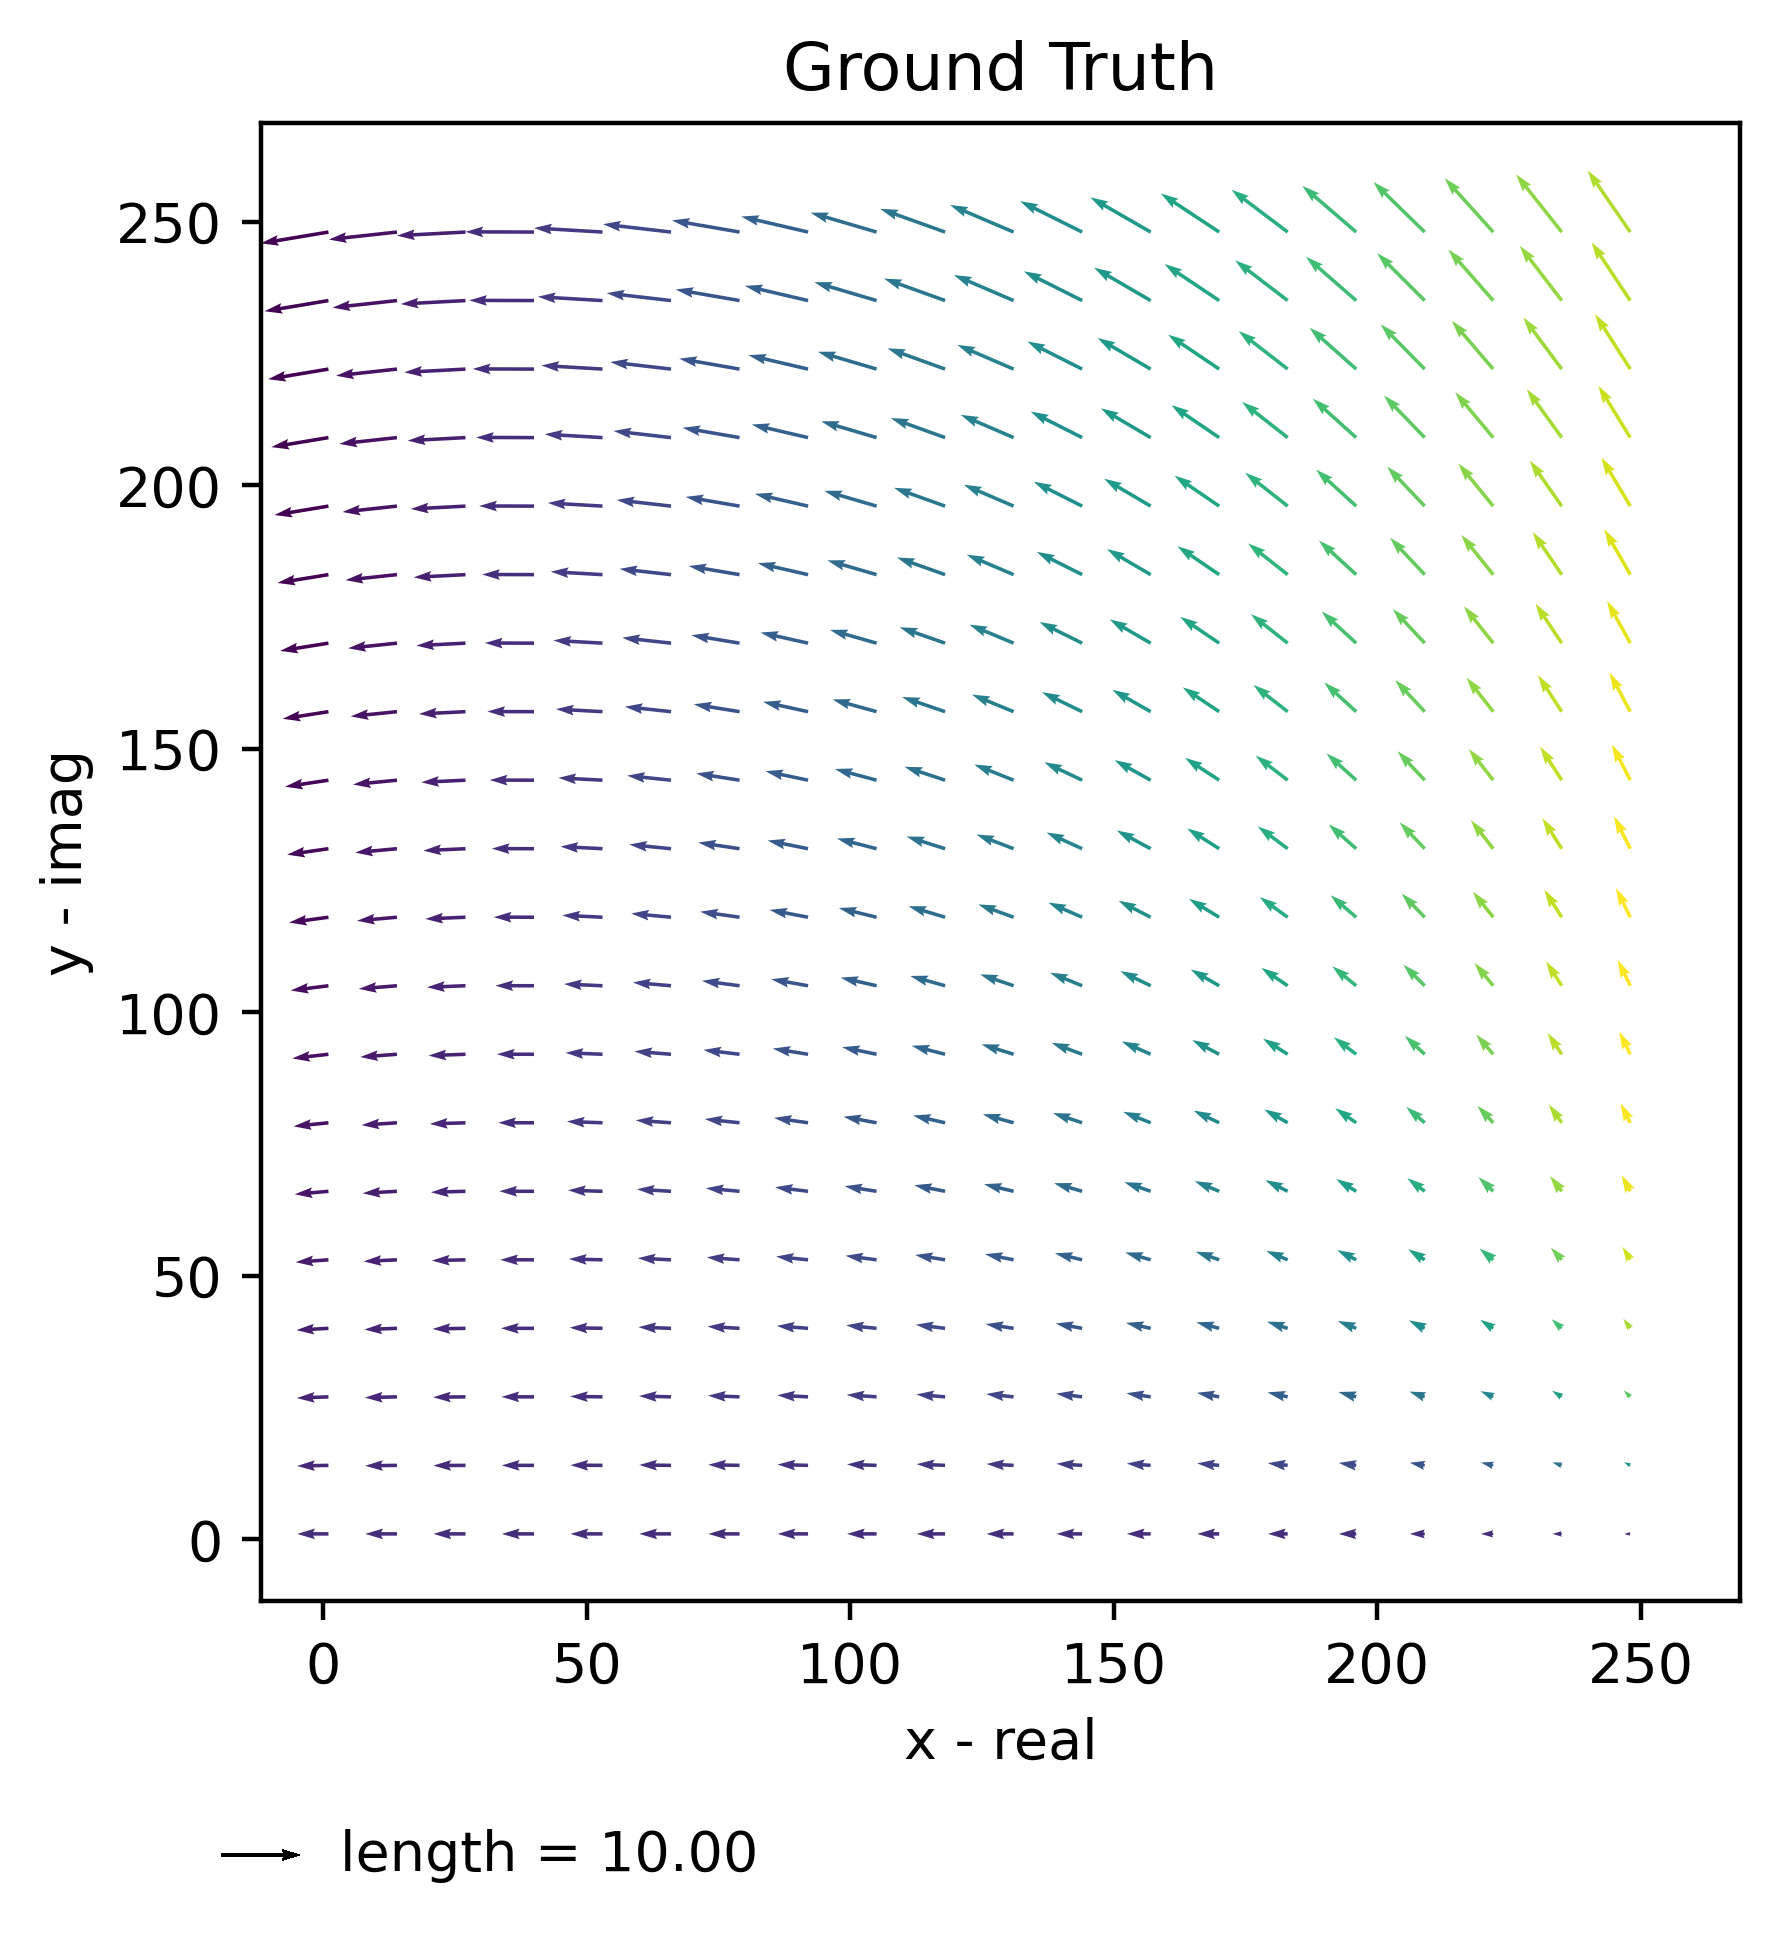

In [7]:
showflow(flow.*(-1), figtitle="Ground Truth")

__Estimated Flow:__

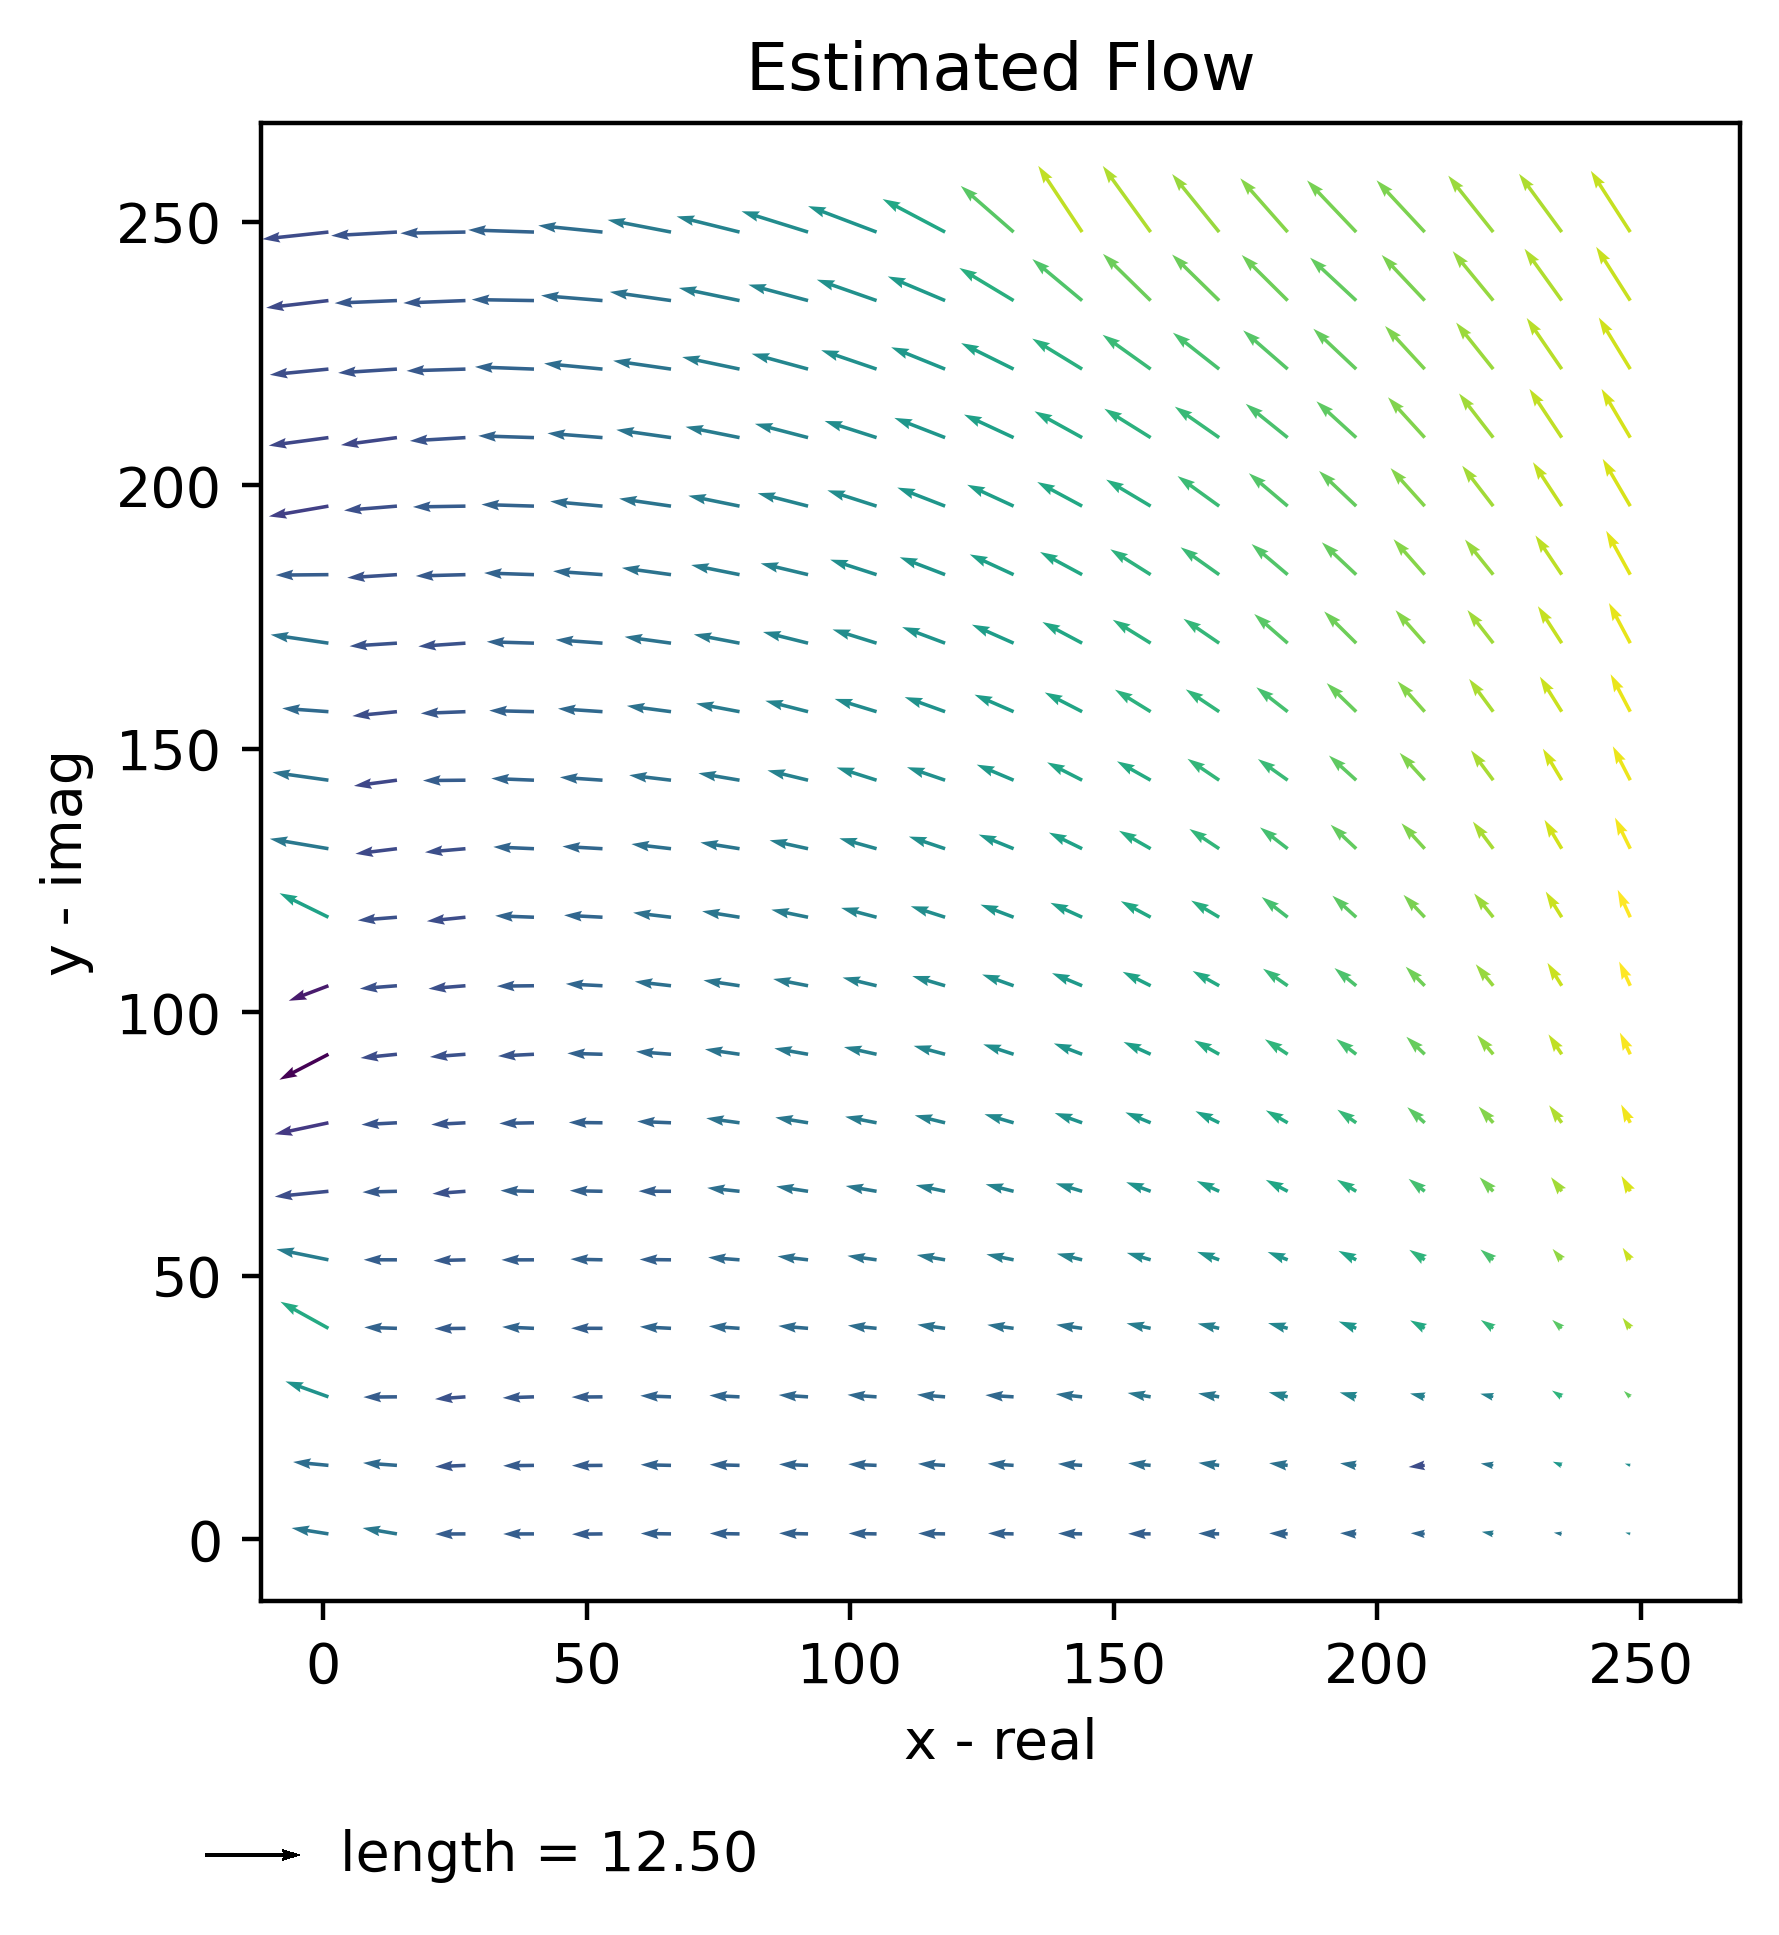

In [8]:
showflow(flow_est, figtitle="Estimated Flow")

The `time_reg_alg` is used to time the registration algorithm, when the original flow isn't known.

## using the `display` keyword
The registration algorithms have a display keyword argument, that can be set to true to output figures
showing the `flow_est` at each iteration and print some extra debug info.

In [9]:
method = sparse_pflap
timer = TimerOutput("ALG: " * string(method))
method_kwargs = Dict(:display => true, :timer => timer, :match_source_histogram => false)
method_args = []
flow_est, source_reg, timer, results, (figs,) = test_registration_alg(method,
                                                                      img,
                                                                      imgw,
                                                                      flow,
                                                                      timer=timer,
                                                                      method_args=method_args,
                                                                      only_flow_compare=false, # this adds source reg tests.
                                                                      method_kwargs=method_kwargs);

ind count: 297
###################
ITERATION: 1
filter_half_size: 64
inner loop iter: 1
	current inds: 69
	non NaN new estim flow vector count: 69
###################
ITERATION: 2
filter_half_size: 32
inner loop iter: 1
	current inds: 157
	non NaN new estim flow vector count: 157
###################
ITERATION: 3
filter_half_size: 16
inner loop iter: 1
	current inds: 210
	non NaN new estim flow vector count: 210
###################
ITERATION: 4
filter_half_size: 8
inner loop iter: 1
	current inds: 243
	non NaN new estim flow vector count: 243
###################
ITERATION: 5
filter_half_size: 4
inner loop iter: 1
	current inds: 256
	non NaN new estim flow vector count: 256
###################
ITERATION: 6
filter_half_size: 2
inner loop iter: 1
	current inds: 272
	non NaN new estim flow vector count: 261
###################
ITERATION: 7
filter_half_size: 1
inner loop iter: 1
	current inds: 282
	non NaN new estim flow vector count: 235
 ────────────────────────────────────────────────────

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*